In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter

import wfdb

In [2]:
controlData = [];
fallerData = [];

for i in range(45):

    index = '{:03}'.format(i)
    fileName = 'LabWalks/co' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        controlData.append(tmp)
    
    index = '{:03}'.format(i)
    fileName = 'LabWalks/fl' + index + '_base'
    if os.path.isfile(fileName + '.hea'):
        record = wfdb.rdrecord(fileName)
        data = record.p_signal
        tmp = np.linalg.norm(data[:,0:3],axis=1)
        #print(np.size(tmp))
        fallerData.append(tmp)

print(np.size(controlData))
print(np.size(fallerData))

#wfdb.plot_wfdb(record=record) 
#display(record.__dict__)


38
35


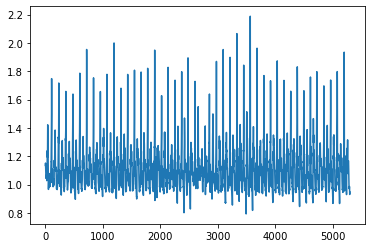

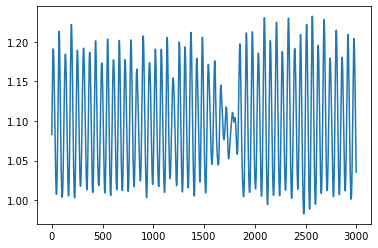

In [3]:
plt.plot(fallerData[3])
plt.figure()
a = gaussian_filter(fallerData[3], sigma = 10)
plt.plot(a[1000:4000])

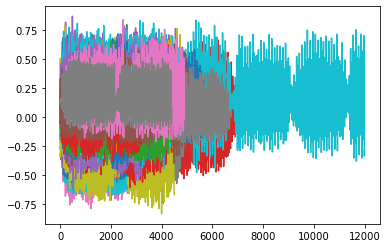

In [4]:
SkipedCycles = 3
NumOfCycles = 40
NumOfSamples = 1000

X = [[]]
y = []

j = 0

alldata = controlData

for one in alldata:
    pdata = one - 1
    scaler = np.sort(pdata)[int(len(pdata)*0.98)]
    scaledData = pdata / scaler
    filterdData = gaussian_filter(scaledData, sigma = 5)
    TH = 0.3
    
    index = 0
    plt.plot(filterdData)
    for i in range(SkipedCycles):
        while filterdData[index] < TH:
            index = index + 1
        while filterdData[index] >= TH:
            index = index + 1
    while index < len(one):
        startIndex = index
        while index < len(one) and filterdData[index] < TH:
            index = index + 1
        while index < len(one) and filterdData[index] >= TH:
            index = index + 1
        endIndex = index    
        if endIndex < len(one):
            usedData = scaledData[startIndex: endIndex]
            #print(np.size(usedData))
            f = interp1d(range(len(usedData)), usedData, kind='cubic')
            x = np.linspace(0, len(usedData)-1, num=NumOfSamples, endpoint=False)
            processedData = f(x)
            #plt.plot(processedData)
            X.append(processedData)
            y.append(0)
        
#print(X)
#print(y)

In [5]:
SkipedCycles = 3
NumOfCycles = 40
NumOfSamples = 1000

X = []
y = []

alldata = controlData
for one in alldata:
    pdata = one - 1
    scaler = np.sort(pdata)[int(len(pdata)*0.98)]
    scaledData = pdata / scaler
    filterdData = gaussian_filter(scaledData, sigma = 20)

    index = 0
    #plt.figure()
    for i in range(SkipedCycles):
        while index + 1 < len(one):
            index = index + 1
            if filterdData[index] > max(filterdData[index-1], filterdData[index+1]):
                break;
    index = index + 1;
    while index + 1 < len(one):
        startIndex = index
        #print(startIndex)
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index  
        #print(endIndex)

        if endIndex < len(one) - 1:
            usedData = scaledData[startIndex: endIndex]
            f = interp1d(range(len(usedData)), usedData, kind='cubic')
            x = np.linspace(0, len(usedData)-1, num=NumOfSamples, endpoint=False)
            processedData = f(x)
            #plt.plot(processedData)
            X.append(processedData)
            y.append(0) 

print(np.shape(X), np.shape(y))


(2968, 1000) (2968,)


In [6]:
SkipedCycles = 3
NumOfCycles = 40
NumOfSamples = 1000

alldata = fallerData
for one in alldata:
    pdata = one - 1
    scaler = np.sort(pdata)[int(len(pdata)*0.98)]
    scaledData = pdata / scaler
    filterdData = gaussian_filter(scaledData, sigma = 20)

    index = 0
    #plt.figure()
    for i in range(SkipedCycles):
        while index + 1 < len(one):
            index = index + 1
            if filterdData[index] > max(filterdData[index-1], filterdData[index+1]):
                break;
    index = index + 1;
    while index + 1 < len(one):
        startIndex = index
        #print(startIndex)
        while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
            index = index + 1
        index = index + 1
        endIndex = index  
        #print(endIndex)

        if endIndex < len(one) - 1:
            usedData = scaledData[startIndex: endIndex]
            f = interp1d(range(len(usedData)), usedData, kind='cubic')
            x = np.linspace(0, len(usedData)-1, num=NumOfSamples, endpoint=False)
            processedData = f(x)
            #plt.plot(processedData)
            X.append(processedData)
            y.append(1) 

print(np.shape(X), np.shape(y))

(6202, 1000) (6202,)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm, metrics
import datetime as dt

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=42)


#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

print(np.size(y_test))

1241


In [8]:
print(np.shape(X_train), np.shape(y_train))


(4961, 1000) (4961,)


In [9]:
param_C = 5
param_gamma = 0.05

classifier = svm.SVC(C=param_C,gamma=param_gamma,tol=0.001)
#classifier = svm.LinearSVC(C=param_C)

#We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

expected = y_test
predicted = classifier.predict(X_test)
print(expected)
print(predicted)

      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))



Start learning at 2019-10-31 16:57:54.786007
Stop learning 2019-10-31 16:58:12.425542
Elapsed learning 0:00:17.639535
[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,

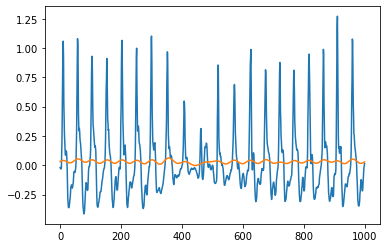

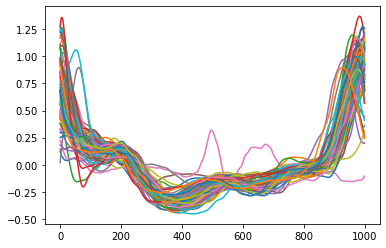

In [10]:
one = controlData[0]
pdata = one - 1
scaler = np.sort(pdata)[int(len(pdata)*0.98)]
scaledData = pdata / scaler
filterdData = gaussian_filter(scaledData, sigma = 20)
start = 1500
plt.plot(scaledData[start:start+1000])
plt.plot(filterdData[start:start+1000])


index = 0
plt.figure()
for i in range(SkipedCycles):
    while index + 1 < len(one):
        index = index + 1
        if filterdData[index] > max(filterdData[index-1], filterdData[index+1]):
            break;
index = index + 1;
while index + 1 < len(one):
    startIndex = index
    #print(startIndex)
    while index + 1 < len(one) and filterdData[index] < max(filterdData[index-1], filterdData[index+1]):
        index = index + 1
    index = index + 1
    endIndex = index  
    #print(endIndex)

    if endIndex < len(one) - 1:
        usedData = scaledData[startIndex: endIndex]
        f = interp1d(range(len(usedData)), usedData, kind='cubic')
        x = np.linspace(0, len(usedData)-1, num=NumOfSamples, endpoint=False)
        processedData = f(x)
        plt.plot(processedData)
        X.append(processedData)
        y.append(0)  

In [11]:
param_C = 1
param_gamma = 0.8

classifier = svm.SVC(C=param_C,gamma=param_gamma,tol=0.001)
#classifier = svm.LinearSVC(C=param_C)

#We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

expected = y_test
predicted = classifier.predict(X_test)
print(expected)
print(predicted)

      
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))


Start learning at 2019-10-31 16:58:16.736190
Stop learning 2019-10-31 16:58:47.798948
Elapsed learning 0:00:31.062758
[1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,